In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data_dir =  "Datasets/cifar10_dataset"

In [3]:
datagen= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

In [4]:
train_data= datagen.flow_from_directory(
    data_dir,
    target_size=(32,32),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

Found 48000 images belonging to 10 classes.


In [5]:
val_data= datagen.flow_from_directory(
    data_dir,
    target_size=(32,32),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 12000 images belonging to 10 classes.


In [8]:
from tensorflow.keras import models, layers, optimizers
model=models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer= optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history= model.fit(train_data, epochs=10, validation_data=val_data)

C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.2290 - loss: 2.1068

C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 201s 264ms/step - accuracy: 0.2291 - loss: 2.1066 - val_accuracy: 0.3163 - val_loss: 1.8863
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 191s 249ms/step - accuracy: 0.3093 - loss: 1.8982 - val_accuracy: 0.3113 - val_loss: 1.8728
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 171s 228ms/step - accuracy: 0.3344 - loss: 1.8373 - val_accuracy: 0.3311 - val_loss: 1.8332
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 191s 254ms/step - accuracy: 0.3484 - loss: 1.8043 - val_accuracy: 0.3422 - val_loss: 1.8203
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 204s 257ms/step - accuracy: 0.3624 - loss: 1.7681 - val_accuracy: 0.3733 - val_loss: 1.7411
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 175s 234ms/step - accuracy: 0.3713 - loss: 1.7453 - val_accuracy: 0.3622 - val_loss: 1.7619
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 182s 243ms/step - accuracy: 0.3719 - loss: 1.7362 - val_accuracy: 0.3808 - val_loss: 1.7236
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 196s 234ms/step - accuracy: 0.3794 - loss: 1.70

Text(0.5, 0, 'Epoch')

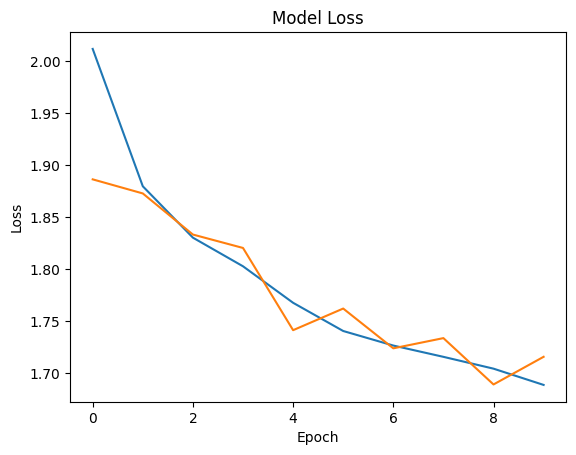

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

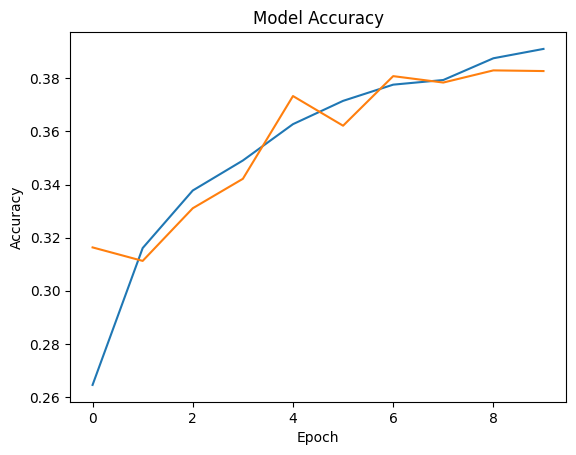

In [45]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.show()

In [46]:
class_label= list(train_data.class_indices.keys())

In [47]:
class_label

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [48]:
x_batch, y_batch=next(val_data)

In [55]:
pred=model.predict(x_batch)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [53]:
'''from tensorflow.keras.preprocessing import image
def display_predict(img_path, actual_label):
    img=image.load_img(img_path, target_size=(32,32))
    img_array=image.img_to_array(img)
    img_array=np.expand_dims(img_array, axis=0)

    pred=model.predict(img_array)
    pred=np.argmax(pred)

    pred_class=class_names[pred]
  

    plt.imshow(img)
    plt.title(f"Predicted: {pred_class} , Actual: {actual_label}")

display_predict("Datasets/cifar10_dataset/3/image_21.png", "cat")'''
    

'from tensorflow.keras.preprocessing import image\ndef display_predict(img_path, actual_label):\n    img=image.load_img(img_path, target_size=(32,32))\n    img_array=image.img_to_array(img)\n    img_array=np.expand_dims(img_array, axis=0)\n\n    pred=model.predict(img_array)\n    pred=np.argmax(pred)\n\n    pred_class=class_names[pred]\n  \n\n    plt.imshow(img)\n    plt.title(f"Predicted: {pred_class} , Actual: {actual_label}")\n\ndisplay_predict("Datasets/cifar10_dataset/3/image_21.png", "cat")'

In [54]:
'''
img='Datasets/cifar10_dataset/3/image_21.png'
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image
img= load_img(img, target_size=(32,32))
img_array= image.img_to_array(img)
img_array=np.expand_dims(img_array, axis=0)
plt.imshow(img)

pred=model.predict(img_array)'''

"\nimg='Datasets/cifar10_dataset/3/image_21.png'\nfrom tensorflow.keras.preprocessing.image import load_img\nfrom tensorflow.keras.preprocessing import image\nimg= load_img(img, target_size=(32,32))\nimg_array= image.img_to_array(img)\nimg_array=np.expand_dims(img_array, axis=0)\nplt.imshow(img)\n\npred=model.predict(img_array)"